In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from cv2 import imshow
from PIL import  Image

## Now we will work with the file-names and make lists of them

In [2]:
with_mask_files = os.listdir('data/with_mask')

In [3]:
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [4]:
without_mask_files= os.listdir('data/without_mask')

In [5]:
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [6]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


## Creating labels:
## with mask --> 1            without mask --> 0

In [7]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [8]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
labels = with_mask_labels + without_mask_labels

In [10]:
print(labels[0:5])

[1, 1, 1, 1, 1]


In [11]:
print(labels[-5:])

[0, 0, 0, 0, 0]


## Image Processing:

## 1. Resize the images
## 2. Convert the images to numpy arrays

In [12]:
with_mask_path = 'data/with_mask/'
data=[]
for img in with_mask_files:
    image = Image.open(with_mask_path + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
without_mask_path = 'data/without_mask/'
for img in without_mask_files:
    image = Image.open(without_mask_path + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\Python 310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(data)

7553

In [14]:
type(data)

list

In [15]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [16]:
data[0].shape

(128, 128, 3)

## Creating the model

In [17]:
x = np.array(data)
y = np.array(labels)

In [18]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [21]:
x_train_scaled = x_train/255

In [22]:
x_test_scaled = x_test/255

## Building CNN

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [25]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [26]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 145s 849ms/step - loss: 0.5019 - acc: 0.7694 - val_loss: 0.2552 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 137s 803ms/step - loss: 0.2971 - acc: 0.8882 - val_loss: 0.1776 - val_acc: 0.9207
Epoch 3/5
170/170 [==============================] - 134s 791ms/step - loss: 0.2306 - acc: 0.9097 - val_loss: 0.1737 - val_acc: 0.9355
Epoch 4/5
170/170 [==============================] - 135s 797ms/step - loss: 0.1961 - acc: 0.9240 - val_loss: 0.1364 - val_acc: 0.9504
Epoch 5/5
170/170 [==============================] - 136s 800ms/step - loss: 0.1678 - acc: 0.9367 - val_loss: 0.1493 - val_acc: 0.9405


In [27]:
## model evaluation

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 190ms/step - loss: 0.2142 - acc: 0.9338
Test Accuracy = 0.9338186383247375


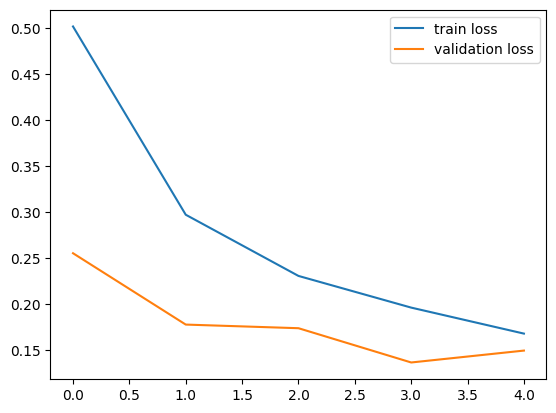

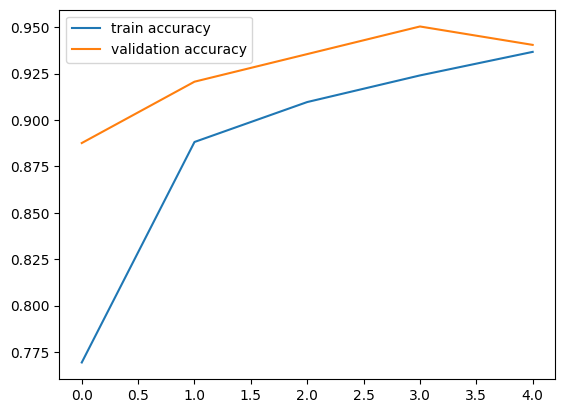

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [30]:
import pickle
pickle.dump(model, open('model.pkl','wb'))